<a href="https://colab.research.google.com/github/samruddd/MySQL/blob/main/job_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READING THE DATA

In [ ]:
df = pd.read_csv('/content/11-7-Dataset-Identify Fake Job Posting - 11-7-Dataset-Identify Fake Job Posting.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


GETTING THE FIRST 5 VALUES

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.value_counts()

job_id  title                                                     location               department         salary_range  company_profile                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

FINDING TOTAL NUMBER OF NULL VALUES

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11553
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

CONVERTING  NULL CATEGORICAL VALUES USING MODE FUNCTION

In [ ]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['department']=df['department'].fillna(df['department'].mode()[0])
df['company_profile']=df['company_profile'].fillna(df['company_profile'].mode()[0])
df['description']=df['description'].fillna(df['description'].mode()[0])
df['benefits']=df['benefits'].fillna(df['benefits'].mode()[0])
df['employment_type']=df['employment_type'].fillna(df['employment_type'].mode()[0])
df['required_experience']=df['required_experience'].fillna(df['required_experience'].mode()[0])
df['required_education']=df['required_education'].fillna(df['required_education'].mode()[0])
df['industry']=df['industry'].fillna(df['industry'].mode()[0])
df['function']=df['function'].fillna(df['function'].mode()[0])

NO NULL VALUES LEFT!!!!!!!

In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                   0
department                 0
salary_range           15012
company_profile            0
description                0
requirements            2695
benefits                   0
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                   0
function                   0
fraudulent                 0
dtype: int64

In [ ]:
df.loc[:,"requirements"]

0        Experience with content management systems a m...
1        What we expect from you:Your key responsibilit...
2        Implement pre-commissioning and commissioning ...
3        EDUCATION: Bachelor’s or Master’s in GIS, busi...
4        QUALIFICATIONS:RN license in the State of Texa...
                               ...                        
17875    To ace this role you:Will eat comprehensive St...
17876    - B.A. or B.S. in Accounting- Desire to have f...
17877    At least 12 years professional experience.Abil...
17878    1. Must be fluent in the latest versions of Co...
17879    We want to hear from you if:You have an in-dep...
Name: requirements, Length: 17880, dtype: object

DROPPING COLUMNS THAT WON'T BE REQUIRED!!!

In [ ]:
df=df.drop(['requirements','salary_range','has_company_logo','has_questions'],axis=1)


In [ ]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            0
benefits               0
telecommuting          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

PLOTTING COUNTPLOT AND BARPLOT

In [ ]:
import seaborn as sns

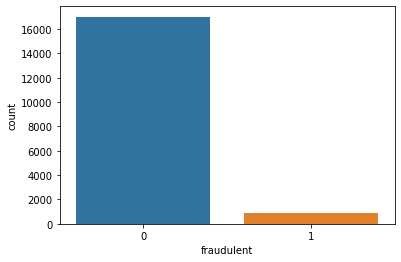

In [ ]:
sns.countplot(x= 'fraudulent',data=df) 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text

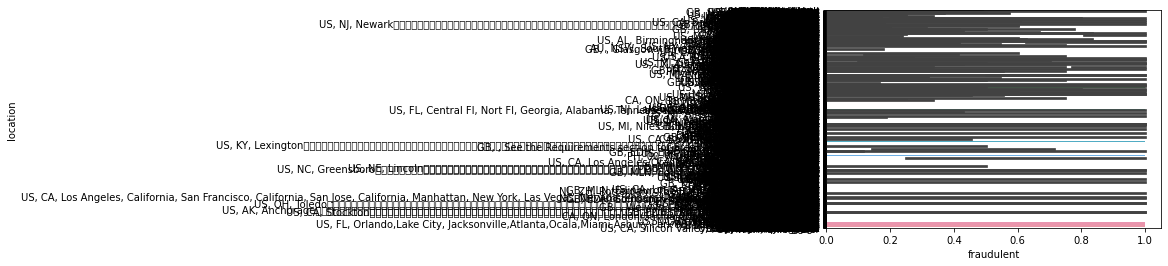

In [ ]:
sns.barplot(x='fraudulent',y='location',data=df)

In [ ]:
X=df.drop('fraudulent',axis=1) #Predictors
y=df['fraudulent'] 
X.head()

,job_id,title,location,department,company_profile,description,benefits,telecommuting,employment_type,required_experience,required_education,industry,function
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",See job description,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What you will get from usThrough being part of...,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",See job description,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,Our culture is anything but corporate—we have ...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,Full Benefits Offered,0,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y) 

In [ ]:
X.head()

,job_id,title,location,department,company_profile,description,benefits,telecommuting,employment_type,required_experience,required_education,industry,function
0,0,5814,2535,726,1526,4496,4080,0,2,4,1,58,22
1,1,2047,1073,1110,50,7246,5569,0,1,6,1,75,7
2,2,1636,1867,1007,1389,7461,4080,0,1,5,1,58,18
3,3,195,1703,1007,975,9581,3334,0,1,5,1,22,31
4,4,861,1741,1007,1210,5714,2253,0,1,5,1,51,16


In [ ]:
X.to_csv('encoded_X_values.csv')
y

array([0, 0, 0, ..., 0, 0, 0])

SPLITTING THE DATA INTO TRAINING AND TESTING SETS

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PREPROCESSING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.32401954,  0.40403908, -1.44174992, ..., -0.48185237,
         0.13427892,  0.14134777],
       [-0.26762651,  0.69990452,  1.09126742, ..., -0.48185237,
         0.13427892,  0.14134777],
       [-1.58487644, -1.58280137,  1.06207484, ..., -0.48185237,
         0.2504823 , -1.58004199],
       ...,
       [-0.68968058, -0.18674551, -0.11461051, ..., -0.48185237,
        -0.1368623 ,  1.86273753],
       [-1.56629909,  0.82449603, -1.613537  , ..., -0.48185237,
         0.13427892,  0.14134777],
       [ 1.32383279, -1.38913253, -1.3912243 , ..., -0.48185237,
         0.13427892,  0.14134777]])

USING RANDOM CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result=my_model.fit(X_train, y_train)

In [ ]:
predictions = result.predict(X_test)
X_test

array([[-0.82165715,  0.70274331, -1.31262891, ...,  2.84259777,
        -1.95738192,  0.14134777],
       [ 0.41122067, -0.67312557,  1.20691493, ...,  0.76481643,
        -0.60167582,  1.86273753],
       [ 0.65853159, -1.51183152,  1.12158279, ..., -0.48185237,
         0.13427892,  0.14134777],
       ...,
       [-0.78392191, -1.23457596,  0.67134345, ...,  0.76481643,
        -0.1368623 , -0.12348143],
       [-0.4317264 ,  0.75131823, -0.12696122, ..., -0.48185237,
         0.13427892,  0.14134777],
       [ 1.53747227, -1.64273147,  0.8857966 , ..., -0.48185237,
        -1.1052238 ,  0.14134777]])

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9868568232662193


PLOTTING CONFUSION MATRIX

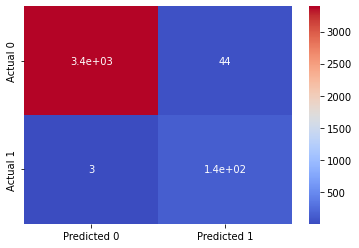

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix =confusion_matrix(predictions,y_test)
confusion_df = pd.DataFrame(conf_matrix, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3395
           1       0.98      0.76      0.85       181

    accuracy                           0.99      3576
   macro avg       0.98      0.88      0.92      3576
weighted avg       0.99      0.99      0.99      3576



USING DECISION TREE ALGORITHM

In [ ]:
from sklearn.tree import DecisionTreeClassifier
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,accuracy_score
mean_absolute_error(y_test, predictions)

0.013143176733780761

In [ ]:
accuracy_score(y_test,predictions)

0.9868568232662193

USING KNN ALGORITHM

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors=3)
result = my_model.fit(X_train,y_train)

In [ ]:

predictions = result.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('With KNN (K=3) accuracy is: ', result.score(X_test,y_test))

With KNN (K=3) accuracy is:  0.9628076062639821


In [ ]:
pred_new=list(result.predict([[3,1636,1867,1007,1389,7461,4080,0,1,5,1,58,18]]))
pred_new


[0]

RANDOM CLASSIFIER AND DECISION TREE HAS HIGH ACCURACY.